**Task Description**
> **By using the Sales Prediction Dataset available on the Kaggle platform, and predict the sales.**





# Libraries

In [1]:
!pip install kaggle

In [65]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,classification_report


# Loading Dataset




>**I could not load the dataset directly from kaggle due to permission issues, therefore, I will be uploading the csv file from my device and start processing on it.**


In [27]:
df=pd.read_csv('/content/advertising.csv')

# Preprocessing Data  

In [28]:
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [29]:
df.shape

(200, 4)

In [30]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [31]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [32]:
df.duplicated().sum()

0

# Visualize the Relationship

In [43]:
mean_values = df.groupby(['TV', 'Newspaper', 'Radio'])['Sales'].mean().reset_index()

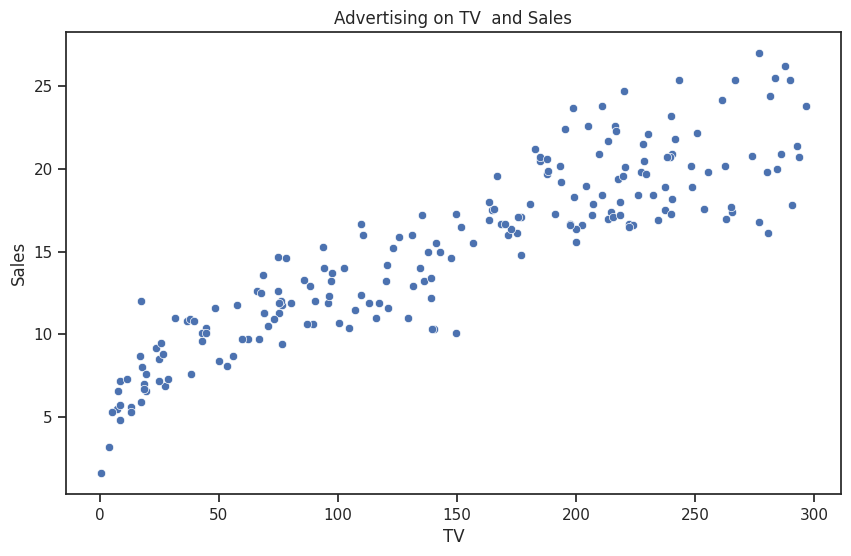

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales")
plt.title('Advertising on TV  and Sales')
plt.show()

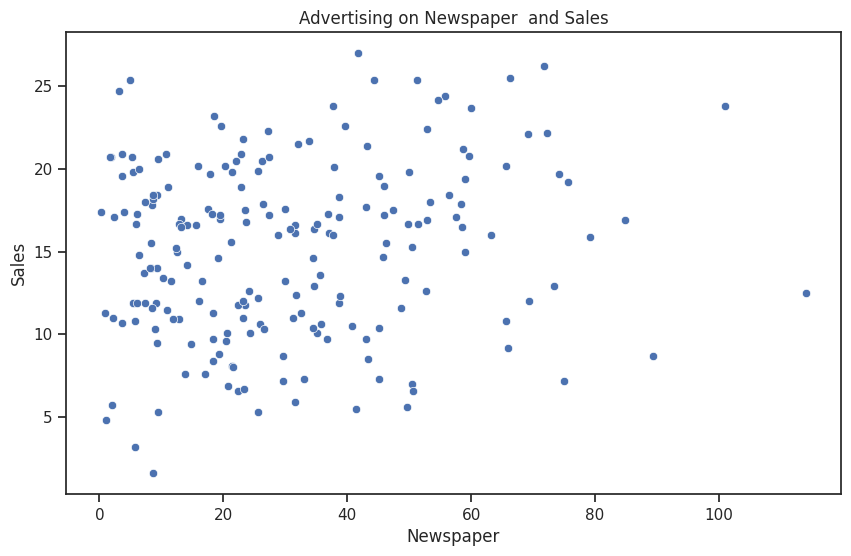

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Newspaper",y="Sales")
plt.title('Advertising on Newspaper  and Sales')
plt.show()

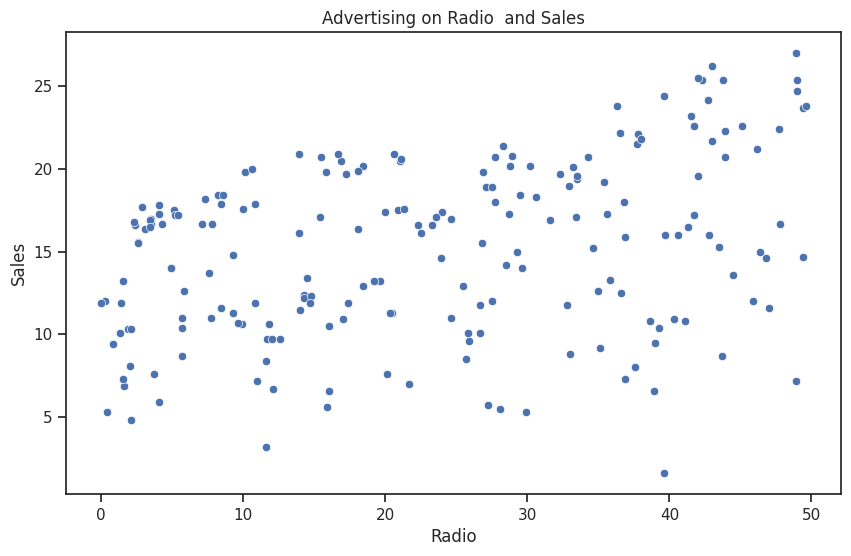

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Radio",y="Sales")
plt.title('Advertising on Radio  and Sales')
plt.show()

# Feature Extraction and Training


In [52]:
features=['TV','Radio','Newspaper']
X=df[features]
y=df['Sales']

In [55]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Linear Regression Model

In [61]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [62]:
y_pred=model.predict(X_test_scaled)


In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.81673545694352
R-squared: 0.8764854501314348




> **Since, MSE is about 3.8 that means that the difference btw the acutal and the predicted values is on average.**


> **R2 is about 0.87 this means that my accuracy is about 87%**



